In [1]:
import sys
import os
cwd = os.getcwd()
sys.path.append('C:\\Users\\bclamber\\Desktop\\pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints._diagnostics as diagnostics
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian (un-normalised) log-posterior (prior * likelihood)
log_posterior = pints.LogPosterior(prior, log_likelihood)

# Create a Population MCMC routine (uses parallel tempering)
x0 = real_parameters
mcmc = pints.PopulationMCMC(log_posterior, x0)

# Use 20000 iterations in total
mcmc.set_iterations(8000)

# Use 5 different temperatures
mcmc.set_num_temperatures(2)

# Disable verbose mode
mcmc.set_verbose(False)

# Run!
print('Running...')
chain = mcmc.run()
print('Done!')

Running...
[[  1.50000000e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-01]]
-2614.255744
-1746.62536288
-297.942785389
-1415.77191301
-32.6937452926
-2745.52472362
-524.472144297
-695.614165892
-251.498946817
-836.458700683
-59.2734906352
149.164296262
-3201.89910833
-1692.44093215
-2605.0436794
-172.666568912
-3416.75749347
-1089.18548461
-1853.54824673
-628.479308593
-120.078485763
-760.690193064
-204.85654941
-138.152426516
-69.1448500031
-1004.46901389
-121.591441476
-957.792852743
-298.494545319
-64.153666653
-262.679148926
-753.646905232
-773.962565054
-19.0545978588
-53.4711693719
-9.97201515395
-455.153805491
-1717.73474104
-332.175142347
-23.8424842308
-175.690216268
-575.156636882
-1448.1457772
-1417.93570383
-68.824346939
-519.669526917
-2629.56121473
-3150.00824287
-547.751001163
-524.453139216
-206.408491913
-8.55671349537
-6.6765837652
-4.80125671787
-6386.64051645
-3208.0092

-79.2580097483
-501.304508863
-23.9939347345
-3102.5303218
-4910.16907336
-199.579962116
-572.268707484
2.6893541089
-112.860308573
-59.4220094077
-208.838141934
-510.000117427
-157.48574503
-664.870521307
-1196.61215571
-259.127432796
-427.209708946
-56.9031888829
-163.515686675
-626.484909905
-366.968193063
-788.007151057
-78.7323402751
-555.350346006
-1335.43607359
-1872.6522319
-5.54055279061
-600.305243961
-210.635574166
-547.002371367
-1778.6989952
-4909.91304711
-74.6825758767
-488.460409179
-12.1033965228
-854.997969137
-108.298758334
-355.313490598
-1370.68134051
-584.936825679
-318.134750865
-2.33558671532
-91.8638804882
-2624.95558088
-647.846799055
-2446.22284317
-102.78770576
-399.64091094
-1520.48938167
-2679.9209786
-0.526976730072
-5987.67454475
-2782.87798279
-383.835494816
-200.40759334
-1.48895286487
-2466.83813551
-22.17634276
-40.3858216162
-99.1192496155
-1144.64010545
-688.981282465
-109.900137618
-62.9556556298
-349.059712171
-2325.16687805
-121.628929841
-234.7

-388.122452838
-199.833075368
-1578.31610375
-2134.49837159
-870.835464257
-95.6385697601
-187.451499269
-3587.25504705
-1687.08617702
-121.268089954
-1736.28643004
-1306.81140491
-2428.56637042
-16.2439206848
-293.971288653
-2188.16451685
-343.967388133
-669.33299086
-1996.9613895
-3431.32656121
-325.617807518
-14.6342423661
-2.29806298011
-66.5401089265
-195.324172011
-539.113281299
-1148.50854296
-160.99496722
-1600.077158
-320.66739006
-949.584172083
-114.98494694
-2216.54432255
-38.2011360941
-2106.27091697
-899.445049578
-453.867719463
-1707.76837167
-220.277040785
-1121.75704555
-6.49956863256
-139.767222203
-127.304023496
-1031.40704579
-1900.72781766
-363.342228955
-2045.90085029
-774.720863934
-193.489821108
-210.391995155
-2591.04006525
-46.2947469223
-367.689274557
-4688.05665404
-32.2164681021
-719.277714787
-311.107982688
-487.289192291
-1075.30264393
-1362.04686395
-43.4524268728
-148.333300554
-1095.04221383
-393.103287612
-2226.21651424
-3564.84804023
-152.750336344
-1

1.79805735439
-195.789752093
-16.9321422854
-305.373129616
-3659.24053783
-163.731549966
-103.444632432
-402.267089089
-69.3057587426
-158.530052077
-247.113558769
-32.7327509645
-8729.36110173
-29.3962901362
-378.622202935
-328.219830253
-52.93712393
-202.784241672
-256.001505296
-564.885930363
-104.496287025
-408.403612775
-3527.0476453
-61.2685354585
-158.987110852
-993.565062901
-847.421727913
-28.6484638345
-180.429048336
-4.41944805601
-11.6278021173
-0.480241411652
-1614.3805286
-1596.5327455
-1812.42006771
-5326.41535667
-1175.10190699
-449.453709321
-2521.00858898
1.09012428533
-16.4425892927
-1241.01510507
-233.028287646
-126.429017597
-54.9894921812
-708.65049687
-3470.06068066
-61.3181578632
-123.601775435
-3407.02640101
-159.776103098
-5.32498792684
-236.917950522
-135.886851569
-33.6958517508
-783.129547031
-131.94882476
-0.458461065616
-354.80987045
-22.1621024354
-2417.14050404
-95.6601732171
-14.1721602003
-251.757947578
-7819.83923491
-172.667275777
-422.279457315
-27

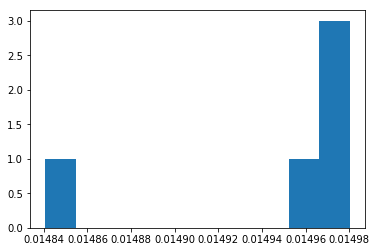

In [3]:
plt.hist(np.unique(chain[0][:,0]))
plt.show()

In [16]:
np.random.randint(3,size=10)
    

array([0, 1, 1, 2, 1, 0, 0, 0, 0, 0])

In [20]:
np.linspace(0,1,11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [27]:
i,j = np.random.choice(5,2,replace=False)

In [28]:
i

0

In [29]:
j

4

In [31]:
[1,1,0.5]==[1,1,1]

False

In [34]:
np.where(np.array([1,1,1])==1)

(array([0, 1, 2], dtype=int64),)

In [2]:
import sys
import os
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\bclamber\\Desktop\\pints\\examples'

In [47]:
test[:, [0], :].shape[0]

4